In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Check the shape
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [4]:
# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),      # Flatten the 28x28 images into 784 vector
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')     # 10 classes -> softmax activation
])


C:\Users\ANISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7794 - loss: 0.6330 - val_accuracy: 0.8508 - val_loss: 0.4065
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8607 - loss: 0.3885 - val_accuracy: 0.8643 - val_loss: 0.3698
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8761 - loss: 0.3458 - val_accuracy: 0.8738 - val_loss: 0.3502
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8852 - loss: 0.3145 - val_accuracy: 0.8683 - val_loss: 0.3508
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8921 - loss: 0.2914 - val_accuracy: 0.8785 - val_loss: 0.3349
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8955 - loss: 0.2820 - val_accuracy: 0.8813 - val_loss: 0.3234
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9019 - loss: 0.2665 - val_accuracy: 0.8838 - val_loss: 0.3301
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9022 - loss: 0.2584 - 

In [7]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8837 - loss: 0.3363
Test Accuracy: 88.39%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


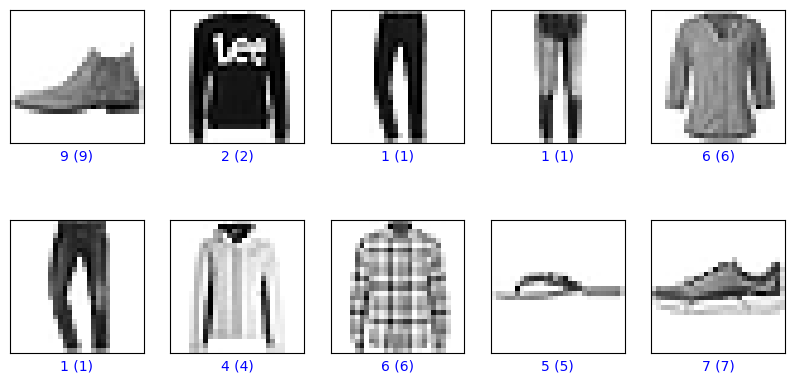

In [8]:
# Make predictions
predictions = model.predict(X_test)

# Function to plot image and prediction
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = tf.argmax(predictions_array[i])
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label.numpy()} ({true_label})", color=color)

# Show first 10 images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plot_image(i, predictions, y_test, X_test)
plt.show()
